In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.dataframe as dd



In [2]:
# Saving the main home directory
import os
default_dir = os.getcwd()

In [4]:
# Change working directory to code
new_dir = '/home/fdi/AliBagheriNejad/Thesis/MECO/code'
os.chdir(new_dir)

## Reading data

In [5]:
# Data files
data_dir = '../data'
data_files = os.listdir(data_dir)
print(data_files)

# File path
file_dir = os.path.join(
        data_dir,
        data_files[0]
    )

['vib_case_dataset_ICMS Dataset.xlsx']


In [6]:
# Read excel file
df = pd.read_excel(
    file_dir
)

df.head()

,time,CTIM,DWATT,TNH_RPM,VibGt_39VS1_1,VibGt_39VS1_2,VibGt_39VS2_1,VibGt_39VS2_2,VibGt_39VS3_1,VibGt_39VS3_2,...,VibGt_39VS32,VibGt_96VC11,VibGt_39V100,VibGt_39V101,VibGt_39V102,VibGt_39V103,VibGt_39V104,VibGt_39V105,VibGt_39V106,VibGt_39V107
0,2021-08-01 00:05:00,22.942000,32.529803,5160.770089,40.317064,47.217068,21.822669,28.925236,49.965705,18.403337,...,4.071320,47.250298,2.071576,1.202392,2.147107,1.008025,42.365572,36.283034,66.701268,94.243103
1,2021-08-01 00:10:00,22.848667,32.603841,5162.906863,40.419535,47.287442,21.797230,29.054097,49.445506,18.450887,...,5.195232,47.959209,2.074257,1.201958,2.151785,1.012741,42.277922,36.410831,66.671368,94.208261
2,2021-08-01 00:15:00,22.444000,32.697212,5162.004736,40.302562,47.125296,21.776783,28.864609,50.013017,18.451363,...,3.528441,48.127902,2.070023,1.200782,2.148505,1.009828,42.343870,36.219136,66.578776,93.999204
3,2021-08-01 00:20:00,22.047334,32.835738,5166.438945,40.381019,47.092249,21.639363,28.994897,49.637608,18.394065,...,3.887639,49.191270,2.081250,1.208112,2.153405,1.016021,42.331211,36.346933,66.692346,94.086371
4,2021-08-01 00:25:00,22.157334,32.825157,5165.271291,40.373887,47.062054,21.615588,28.985149,49.710360,18.475138,...,3.885509,49.477148,2.080951,1.204022,2.152180,1.012143,42.304567,35.988860,66.621335,94.208984


In [7]:
print(
    'Name of sensros are as follows:\n\n',
    df.columns
)

Name of sensros are as follows:

 Index(['time', 'CTIM', 'DWATT', 'TNH_RPM', 'VibGt_39VS1_1', 'VibGt_39VS1_2',
       'VibGt_39VS2_1', 'VibGt_39VS2_2', 'VibGt_39VS3_1', 'VibGt_39VS3_2',
       'VibGt_39VS4_1', 'VibGt_39VS4_2', 'VibGt_39VS5_1', 'VibGt_39VS5_2',
       'VibGt_39V1A', 'VibGt_39V1B', 'VibGt_39V2A', 'VibGt_39V2B',
       'VibGt_39V3A', 'VibGt_39V3B', 'VibGt_39V4A', 'VibGt_39V4B',
       'VibGt_39VS11', 'VibGt_39VS12', 'VibGt_39VS31', 'VibGt_39VS32',
       'VibGt_96VC11', 'VibGt_39V100', 'VibGt_39V101', 'VibGt_39V102',
       'VibGt_39V103', 'VibGt_39V104', 'VibGt_39V105', 'VibGt_39V106',
       'VibGt_39V107'],
      dtype='object')


In [8]:
# Separate two sensors
df_1 = df[['time','VibGt_39VS1_1', 'VibGt_39VS1_2']].copy()

In [9]:
print(f'Shape of dataframe before dropping Nan: {df_1.shape}')
df_1.dropna(axis=0, inplace=True)
print(f'Shape of dataframe after dropping Nan: {df_1.shape}')

Shape of dataframe before dropping Nan: (28032, 3)
Shape of dataframe after dropping Nan: (27723, 3)


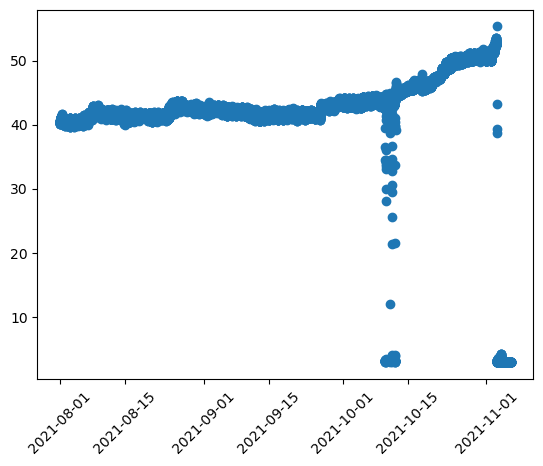

In [10]:
# Plot signal values
plt.scatter(
    df_1['time'].values,
    df_1['VibGt_39VS1_1'].values
)
plt.xticks(rotation=45)
plt.show()

In [11]:
from sklearn.cluster import DBSCAN
import pandas as pd

def remove_outliers_dbscan(df, eps=0.5, min_samples=5):
    """
    Removes outliers from a DataFrame using DBSCAN clustering.

    Args:
        df (pd.DataFrame): Input DataFrame with signal recordings as columns.
        eps (float): Maximum distance between samples in the same cluster.
        min_samples (int): Minimum samples required to form a cluster.

    Returns:
        pd.DataFrame: Cleaned DataFrame with outliers removed.
    """
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(df)
    # Keep only rows that belong to a cluster (cluster label != -1)
    return df[clustering.labels_ != -1]

# Example usage
# df is your DataFrame with signal recordings
cleaned_df = remove_outliers_dbscan(df_1.drop('time',axis=1), eps=2.0, min_samples=10)


## Samples

In [13]:
def create_dataset(sensor_data, sample_length=10):
    """
    Splits sensor data into samples of given length.

    Parameters:
    - sensor_data: Pandas Series or 1D array-like containing the sensor's data.
    - sample_length: Length of each sample.

    Returns:
    - A new DataFrame where each row is a sample.
    """
    num_samples = len(sensor_data) // sample_length  # Number of full samples
    # Reshape the data to (num_samples, sample_length)
    samples = sensor_data[:num_samples * sample_length].values.reshape(-1, sample_length)
    # Convert to DataFrame
    return pd.DataFrame(samples)

# Creating a dataset of segmented samples
df_1_1 = create_dataset(df_1['VibGt_39VS1_1'], sample_length=10)
df_1_2 = create_dataset(df_1['VibGt_39VS1_2'], sample_length=10)

In [17]:
print(f"Shape of segmented dataset for sensor  I is {df_1_1.shape}")
print(f"Shape of segmented dataset for sensor II is {df_1_2.shape}")

Shape of segmented dataset for sensor  I is (2772, 10)
Shape of segmented dataset for sensor II is (2772, 10)


In [ ]:
# Saving datasets 
df_1_1.to_csv('../data/sensor_1.csv')
df_1_2.to_csv('../data/sensor_2.csv')

In [22]:
# Check if the datasets are created
file_names = os.listdir('../data')
print('Files are there') if ('sensor_1.csv' in  file_names)or ('sensor_2.csv' in file_names) else print('Files are no created')

Files are there
